In [98]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt

In [99]:
sold_merged = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_merged.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [100]:
sold_merged.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city',
       'state', 'zip_code', 'house_size', 'prev_sold_date', 'county',
       'avgtemp', 'precipitation', 'maxtemp', 'mintemp', 'population',
       'density', 'po_box', 'dhighway', 'dlairport', 'dmairport', 'dshore',
       'nobusiness', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [101]:
sold_merged.dtypes

brokered_by              string[python]
price                           float64
bed                             float64
bath                            float64
acre_lot                        float64
street                   string[python]
city                             object
state                            object
zip_code                 string[python]
house_size                      float64
prev_sold_date           datetime64[ns]
county                           object
avgtemp                         float64
precipitation                   float64
maxtemp                         float64
mintemp                         float64
population                        int64
density                         float64
po_box                           object
dhighway                        float64
dlairport                       float64
dmairport                       float64
dshore                          float64
nobusiness                      float64
adjusted_gross_income             int64


In [102]:
# Begin to investigate missingness.
sold_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763205 entries, 0 to 763204
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   brokered_by            760227 non-null  string        
 1   price                  763205 non-null  float64       
 2   bed                    694758 non-null  float64       
 3   bath                   686865 non-null  float64       
 4   acre_lot               664038 non-null  float64       
 5   street                 760966 non-null  string        
 6   city                   763107 non-null  object        
 7   state                  763205 non-null  object        
 8   zip_code               763205 non-null  string        
 9   house_size             667089 non-null  float64       
 10  prev_sold_date         763205 non-null  datetime64[ns]
 11  county                 763205 non-null  object        
 12  avgtemp                763205 non-null  floa

<Axes: >

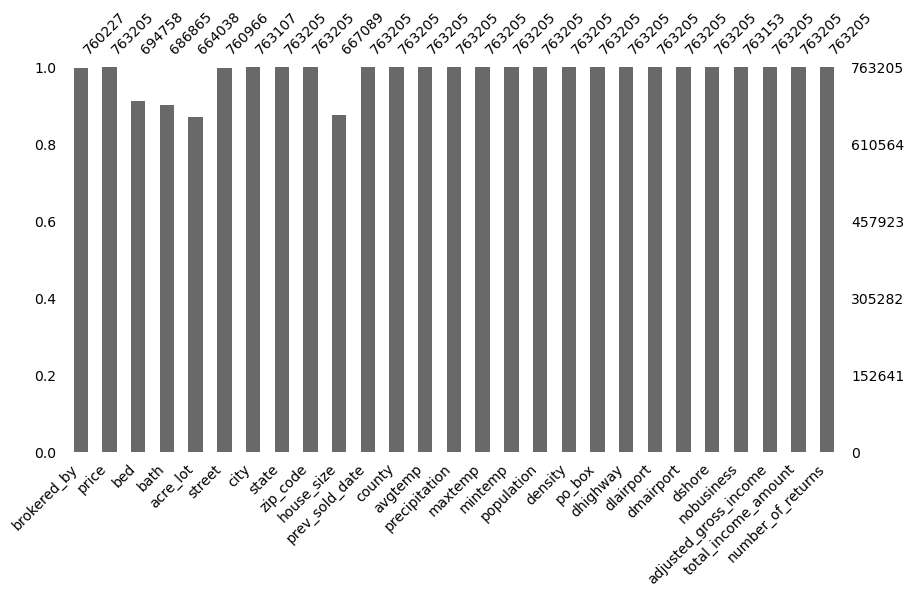

In [103]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

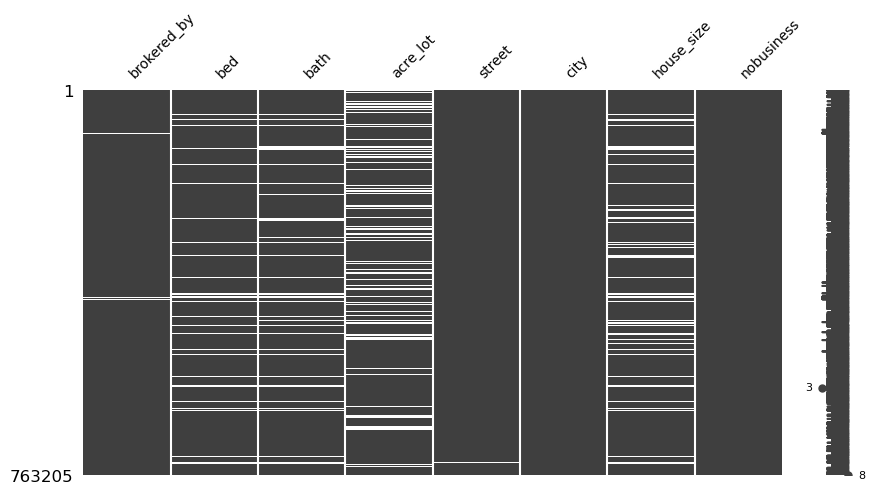

In [104]:
# See missingness patterns for variables with at least 1 missing value
missingno.matrix(sold_merged[['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'city', 'house_size', 'nobusiness']], figsize = (10,5), fontsize = 10)

<Axes: >

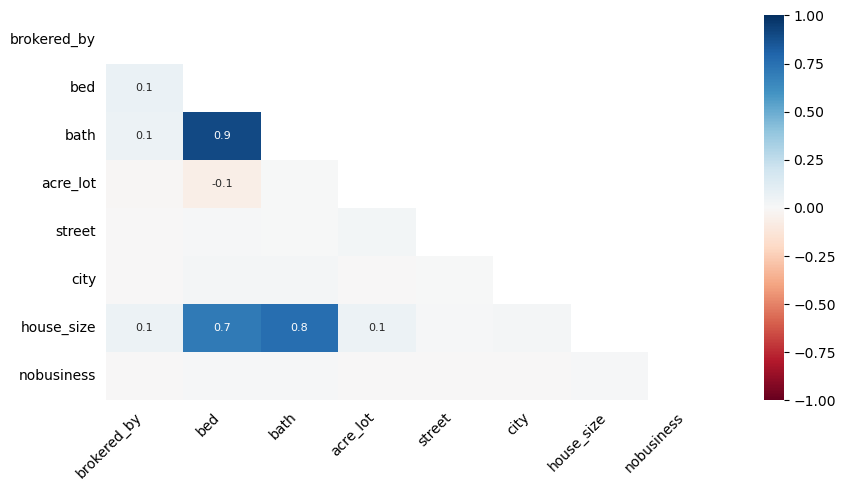

In [105]:
missingno.heatmap(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

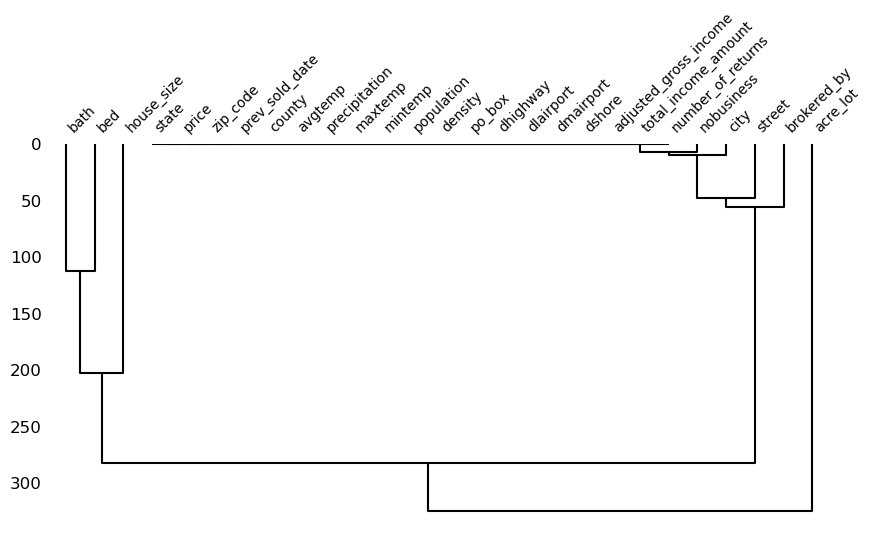

In [106]:
missingno.dendrogram(sold_merged, figsize = (10,5), fontsize = 10)

In [ ]:
# Correlations to see if there are any strong ones which could be used for imputation
sold_merged.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,precipitation,maxtemp,mintemp,population,density,dhighway,dlairport,dmairport,dshore,nobusiness,adjusted_gross_income,total_income_amount,number_of_returns
price,1.000000,0.212643,0.372301,0.004493,0.177943,0.027547,-0.130851,0.029354,0.024337,0.058553,0.181328,-0.060678,-0.124364,-0.057412,-0.113087,0.191364,0.338794,0.339069,0.067798
bed,0.212643,1.000000,0.650926,0.000767,0.315580,-0.025176,-0.005585,-0.018886,-0.031009,0.049179,-0.094725,-0.013015,0.013680,0.008198,0.024433,-0.059682,0.017484,0.017468,0.038898
bath,0.372301,0.650926,1.000000,-0.002201,0.382278,0.043945,0.029553,0.043149,0.043135,0.062293,-0.047591,-0.036321,-0.058066,-0.007394,-0.018570,0.049277,0.167357,0.167649,0.066004
acre_lot,0.004493,0.000767,-0.002201,1.000000,0.000420,-0.007597,-0.003892,-0.007023,-0.007977,-0.004063,-0.001239,0.002229,0.008620,-0.003589,-0.000476,-0.001539,-0.004053,-0.004053,-0.004329
house_size,0.177943,0.315580,0.382278,0.000420,1.000000,-0.009004,0.010956,-0.008427,-0.009193,0.000670,-0.031688,0.008854,0.002356,0.013856,0.015909,-0.001578,0.052299,0.052441,-0.000995
avgtemp,0.027547,-0.025176,0.043945,-0.007597,-0.009004,1.000000,-0.029621,0.983478,0.980186,0.198664,-0.010191,-0.062596,-0.183637,-0.120263,-0.090702,0.044528,0.088278,0.088041,0.190323
precipitation,-0.130851,-0.005585,0.029553,-0.003892,0.010956,-0.029621,1.000000,-0.152360,0.106175,-0.138789,-0.036539,0.013333,-0.112476,0.010530,-0.201906,-0.048371,-0.074332,-0.074497,-0.121389
maxtemp,0.029354,-0.018886,0.043149,-0.007023,-0.008427,0.983478,-0.152360,1.000000,0.928167,0.203412,-0.045010,-0.041268,-0.115426,-0.103921,0.013610,0.030335,0.069092,0.068876,0.189486
mintemp,0.024337,-0.031009,0.043135,-0.007977,-0.009193,0.980186,0.106175,0.928167,1.000000,0.185698,0.027675,-0.083581,-0.250990,-0.133487,-0.200474,0.058089,0.105452,0.105201,0.183773
population,0.058553,0.049179,0.062293,-0.004063,0.000670,0.198664,-0.138789,0.203412,0.185698,1.000000,0.225379,-0.275881,-0.198650,-0.257190,-0.073994,0.517063,0.566109,0.565635,0.985191


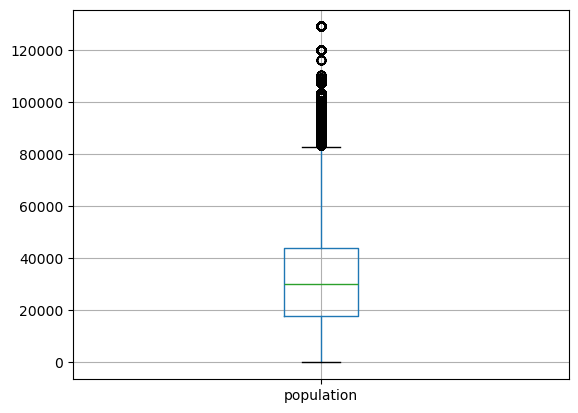

107864.0


In [ ]:
# Boxplots to observe distributions
x = 'population'
sold_merged.boxplot(x)
plt.show()
plt.hlines(y = sold_merged[x].quantile(0.975), xmin = 0.5, xmax = 1.5)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


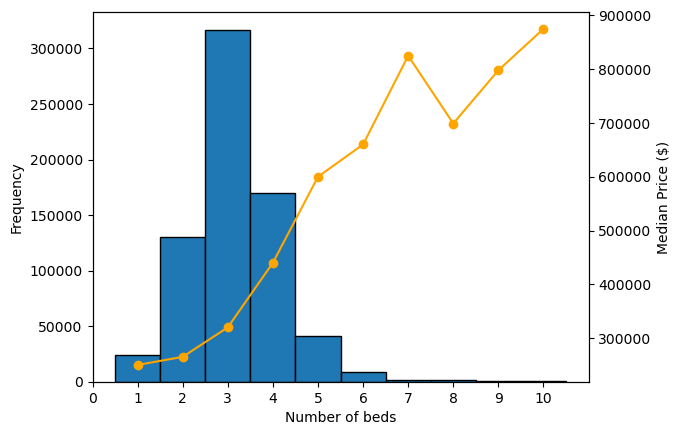

In [112]:
# Bedroom univariate
fig, ax = plt.subplots()

hist_bed = ax.hist(sold_merged[sold_merged.bed <= sold_merged.bed.quantile(0.999)].bed, ec = 'black', bins = np.arange(0,sold_merged.bed.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bed == x].price.median() for x in np.arange(1,sold_merged.bed.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,11), labels = np.arange(0,11))
ax.set_xlabel('Number of beds')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print([((hist_bed[1][x] + hist_bed[1][x+1])/2) for x in range(len(hist_bed[1])-1)])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


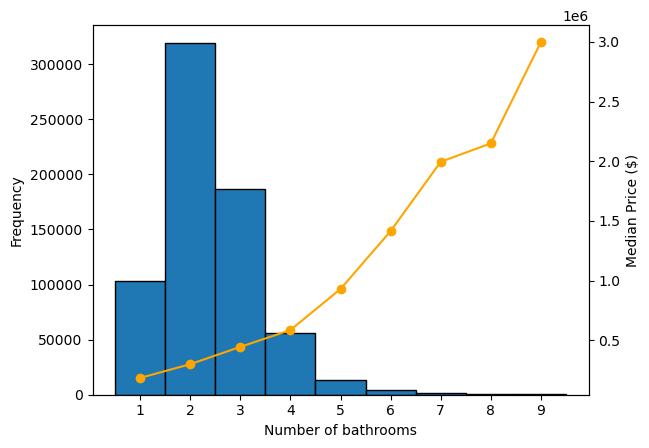

In [113]:
# Bathroom univariate
fig, ax = plt.subplots()

hist_bath = ax.hist(sold_merged[sold_merged.bath <= sold_merged.bed.quantile(0.999)].bath, ec = 'black', bins = np.arange(0,sold_merged.bath.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bath == x].price.median() for x in np.arange(1,sold_merged.bath.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,10), labels = np.arange(0,10))
ax.set_xlabel('Number of bathrooms')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print([((hist_bath[1][x] + hist_bath[1][x+1])/2) for x in range(len(hist_bath[1])-1)])

[595.0, 1585.0, 2575.0, 3565.0, 4555.0, 5545.0, 6535.0, 7525.0, 8515.0, 9505.0]


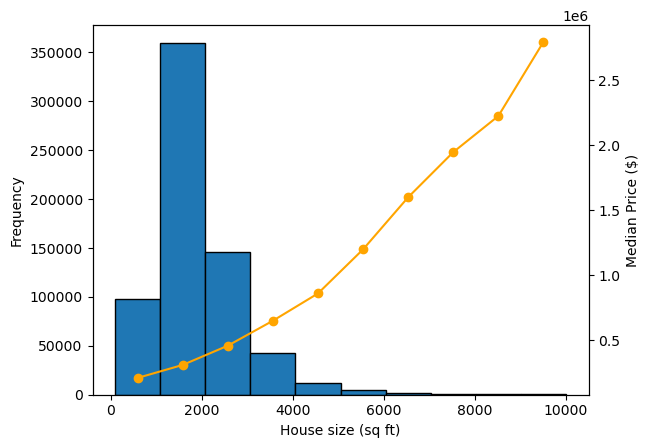

In [114]:
# House size univariate
fig, ax = plt.subplots()

hist_size = ax.hist(sold_merged[sold_merged.house_size <= sold_merged.house_size.quantile(0.999)].house_size, ec = 'black')
midpts = [((hist_size[1][x] + hist_size[1][x+1])/2) for x in range(len(hist_size[1])-1)]
prices = [sold_merged[(sold_merged.house_size >= hist_size[1][x]) & (sold_merged.house_size < hist_size[1][x+1])].price.median() for x in range(len(hist_size[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('House size (sq ft)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[0.091, 0.273, 0.455, 0.637, 0.819, 1.001, 1.183, 1.365, 1.547, 1.729]


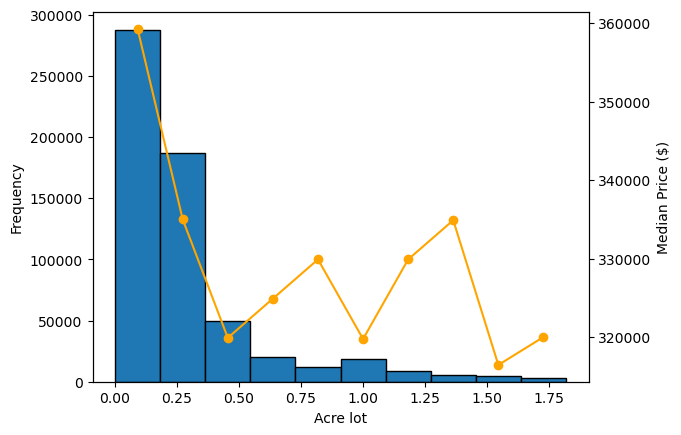

In [115]:
# Acre lot univariate
fig, ax = plt.subplots()

hist_acre = ax.hist(sold_merged[sold_merged.acre_lot <= sold_merged.acre_lot.quantile(0.9)].acre_lot, ec = 'black')
midpts = [((hist_acre[1][x] + hist_acre[1][x+1])/2) for x in range(len(hist_acre[1])-1)]
prices = [sold_merged[(sold_merged.acre_lot >= hist_acre[1][x]) & (sold_merged.acre_lot < hist_acre[1][x+1])].price.median() for x in range(len(hist_acre[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Acre lot')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[37.4  41.48 45.56 49.64 53.72 57.8  61.88 65.96 70.04 74.12 78.2 ]


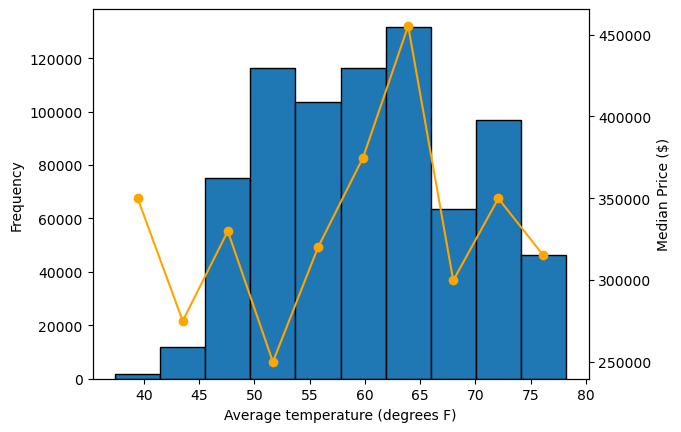

In [116]:
# Average temp univariate
fig, ax = plt.subplots()

hist_avgtemp = ax.hist(sold_merged.avgtemp, ec = 'black')
midpts = [((hist_avgtemp[1][x] + hist_avgtemp[1][x+1])/2) for x in range(len(hist_avgtemp[1])-1)]
prices = [sold_merged[(sold_merged.avgtemp >= hist_avgtemp[1][x]) & (sold_merged.avgtemp < hist_avgtemp[1][x+1])].price.median() for x in range(len(hist_avgtemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Average temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(hist_avgtemp[1])

[49.80500000000001, 54.015, 58.225, 62.434999999999995, 66.645, 70.85499999999999, 75.065, 79.27499999999999, 83.485, 87.695]


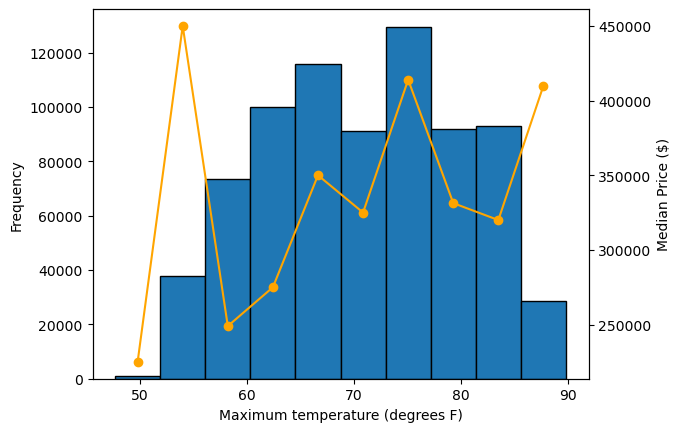

In [117]:
# Max temp univariate
fig, ax = plt.subplots()

hist_maxtemp = ax.hist(sold_merged.maxtemp, ec = 'black')
midpts = [((hist_maxtemp[1][x] + hist_maxtemp[1][x+1])/2) for x in range(len(hist_maxtemp[1])-1)]
prices = [sold_merged[(sold_merged.maxtemp >= hist_maxtemp[1][x]) & (sold_merged.maxtemp < hist_maxtemp[1][x+1])].price.median() for x in range(len(hist_maxtemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Maximum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[25.6  30.03 34.46 38.89 43.32 47.75 52.18 56.61 61.04 65.47 69.9 ]


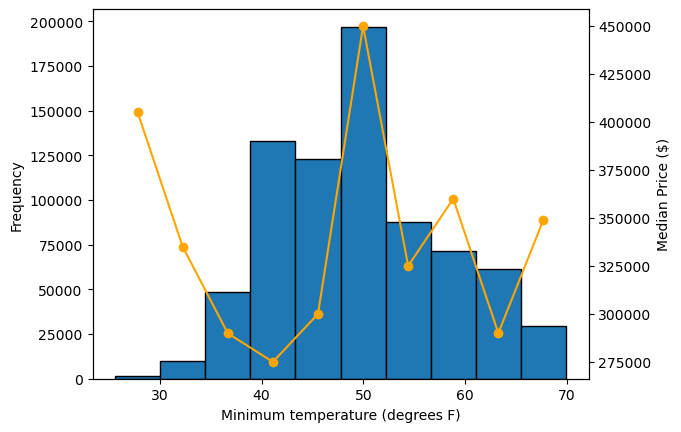

In [118]:
# Min temp univariate
fig, ax = plt.subplots()

hist_mintemp = ax.hist(sold_merged.mintemp, ec = 'black')
midpts = [((hist_mintemp[1][x] + hist_mintemp[1][x+1])/2) for x in range(len(hist_mintemp[1])-1)]
prices = [sold_merged[(sold_merged.mintemp >= hist_mintemp[1][x]) & (sold_merged.mintemp < hist_mintemp[1][x+1])].price.median() for x in range(len(hist_mintemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Minimum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(hist_mintemp[1])

[7.997, 19.451, 30.905, 42.35900000000001, 53.813, 65.267, 76.721, 88.175, 99.629, 111.083]


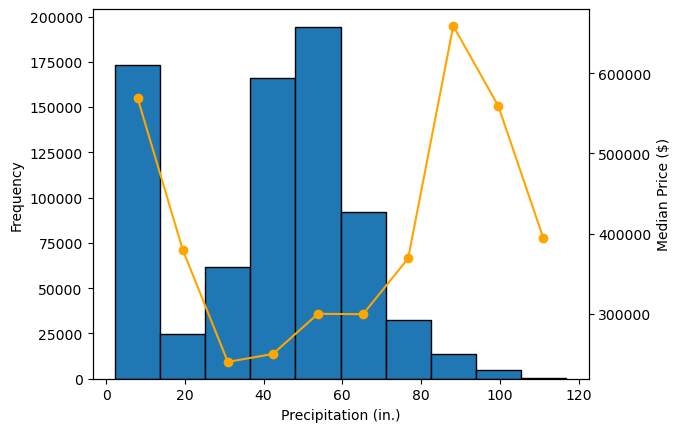

In [119]:
# Precipitation univariate
fig, ax = plt.subplots()

hist_precip = ax.hist(sold_merged.precipitation, ec = 'black')
midpts = [((hist_precip[1][x] + hist_precip[1][x+1])/2) for x in range(len(hist_precip[1])-1)]
prices = [sold_merged[(sold_merged.precipitation >= hist_precip[1][x]) & (sold_merged.precipitation < hist_precip[1][x+1])].price.median() for x in range(len(hist_precip[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Precipitation (in.)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[6458.25, 19374.75, 32291.25, 45207.75, 58124.25, 71040.75, 83957.25, 96873.75, 109790.25, 122706.75]


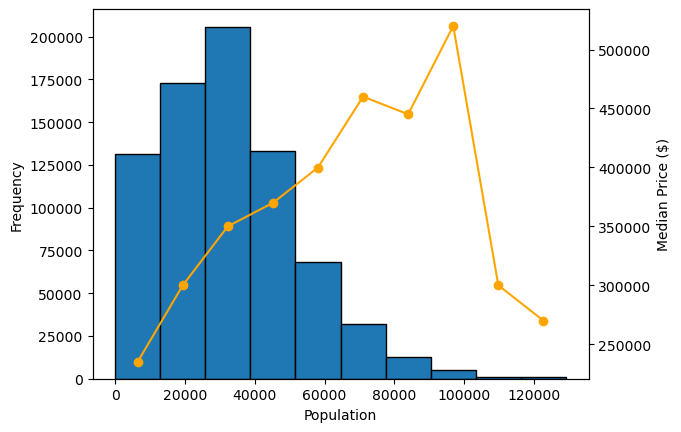

In [120]:
# Population univariate
fig, ax = plt.subplots()

hist_pop = ax.hist(sold_merged.population, ec = 'black')
midpts = [((hist_pop[1][x] + hist_pop[1][x+1])/2) for x in range(len(hist_pop[1])-1)]
prices = [sold_merged[(sold_merged.population >= hist_pop[1][x]) & (sold_merged.population < hist_pop[1][x+1])].price.median() for x in range(len(hist_pop[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Population')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[616.485, 1849.455, 3082.425, 4315.395, 5548.365, 6781.335, 8014.305, 9247.275000000001, 10480.244999999999, 11713.215]


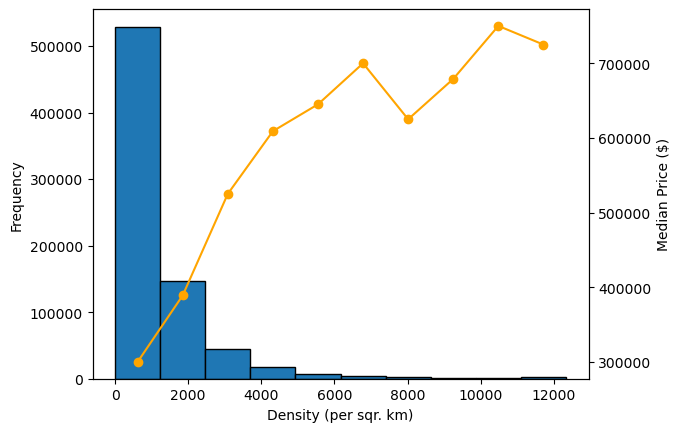

In [121]:
# Density univariate
fig, ax = plt.subplots()

hist_density = ax.hist(sold_merged[sold_merged.density <= sold_merged.density.quantile(0.99)].density, ec = 'black')
midpts = [((hist_density[1][x] + hist_density[1][x+1])/2) for x in range(len(hist_density[1])-1)]
prices = [sold_merged[(sold_merged.density >= hist_density[1][x]) & (sold_merged.density < hist_density[1][x+1])].price.median() for x in range(len(hist_density[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Density (per sqr. km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[3.709892847918903, 11.129111991058586, 18.548331134198268, 25.967550277337953, 33.386769420477634, 40.80598856361732, 48.225207706757, 55.64442684989668, 63.063645993036374, 70.48286513617606]


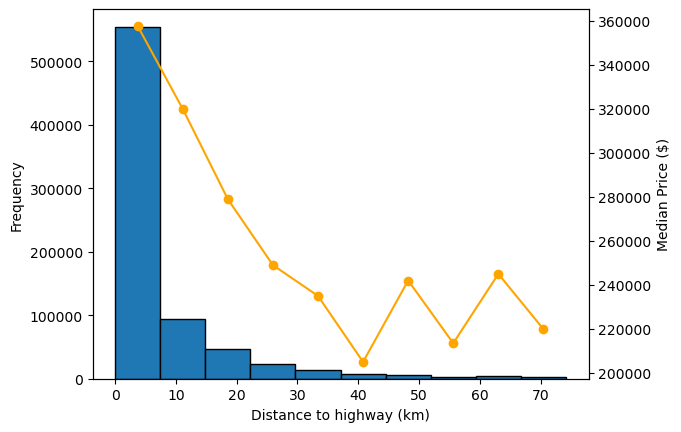

In [122]:
# Distance to highway univariate
fig, ax = plt.subplots()

hist_dhighway = ax.hist(sold_merged[sold_merged.dhighway <= sold_merged.dhighway.quantile(0.99)].dhighway, ec = 'black')
midpts = [((hist_dhighway[1][x] + hist_dhighway[1][x+1])/2) for x in range(len(hist_dhighway[1])-1)]
prices = [sold_merged[(sold_merged.dhighway >= hist_dhighway[1][x]) & (sold_merged.dhighway < hist_dhighway[1][x+1])].price.median() for x in range(len(hist_dhighway[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to highway (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[27.082208294478516, 80.39778584906183, 133.71336340364516, 187.02894095822847, 240.3445185128118, 293.6600960673951, 346.97567362197844, 400.29125117656173, 453.6068287311451, 506.92240628572836]


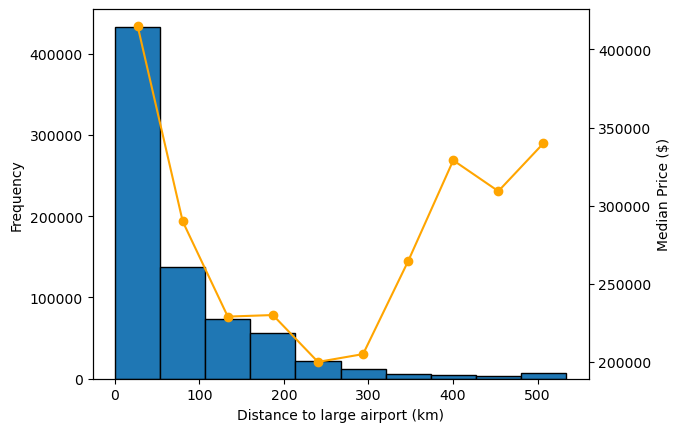

In [123]:
# Distance to large airport univariate
fig, ax = plt.subplots()

hist_lairport = ax.hist(sold_merged[sold_merged.dlairport <= sold_merged.dlairport.quantile(0.99)].dlairport, ec = 'black')
midpts = [((hist_lairport[1][x] + hist_lairport[1][x+1])/2) for x in range(len(hist_lairport[1])-1)]
prices = [sold_merged[(sold_merged.dlairport >= hist_lairport[1][x]) & (sold_merged.dlairport < hist_lairport[1][x+1])].price.median() for x in range(len(hist_lairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to large airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[4.713100677076017, 13.749139331123985, 22.785177985171956, 31.82121663921992, 40.85725529326789, 49.893293947315854, 58.929332601363825, 67.96537125541178, 77.00140990945977, 86.03744856350772]


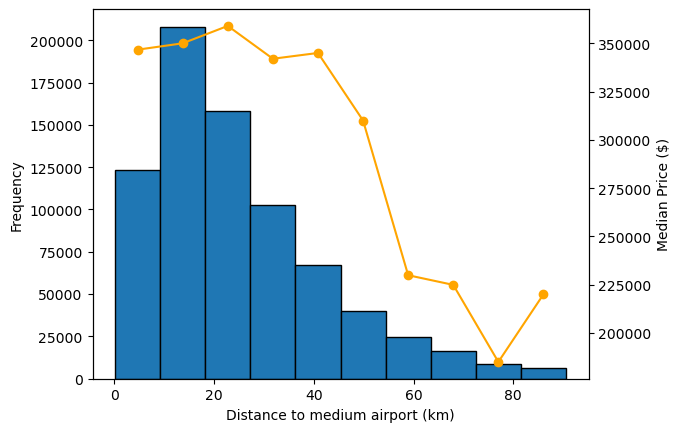

In [124]:
# Distance to medium airport univariate
fig, ax = plt.subplots()

hist_mairport = ax.hist(sold_merged[sold_merged.dmairport <= sold_merged.dmairport.quantile(0.99)].dmairport, ec = 'black')
midpts = [((hist_mairport[1][x] + hist_mairport[1][x+1])/2) for x in range(len(hist_mairport[1])-1)]
prices = [sold_merged[(sold_merged.dmairport >= hist_mairport[1][x]) & (sold_merged.dmairport < hist_mairport[1][x+1])].price.median() for x in range(len(hist_mairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to medium airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[51.985533694118374, 155.93370254171015, 259.8818713893019, 363.8300402368937, 467.77820908448547, 571.7263779320772, 675.6745467796691, 779.6227156272607, 883.5708844748526, 987.5190533224443]


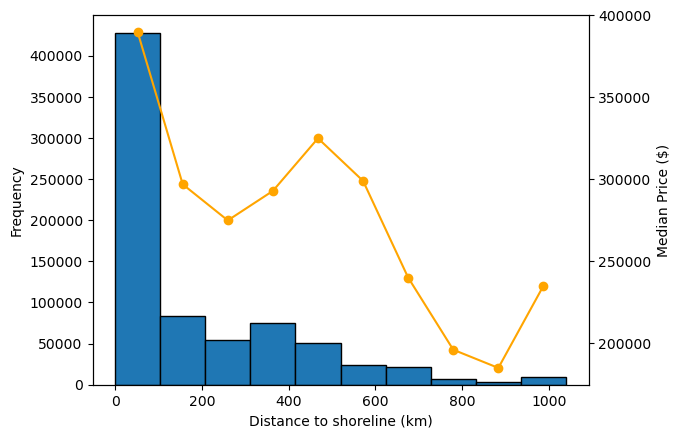

In [125]:
# Distance to shoreline univariate
fig, ax = plt.subplots()

hist_shoreline = ax.hist(sold_merged[sold_merged.dshore <= sold_merged.dshore.quantile(0.99)].dshore, ec = 'black')
midpts = [((hist_shoreline[1][x] + hist_shoreline[1][x+1])/2) for x in range(len(hist_shoreline[1])-1)]
prices = [sold_merged[(sold_merged.dshore >= hist_shoreline[1][x]) & (sold_merged.dshore < hist_shoreline[1][x+1])].price.median() for x in range(len(hist_shoreline[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to shoreline (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[126.5, 377.5, 628.5, 879.5, 1130.5, 1381.5, 1632.5, 1883.5, 2134.5, 2385.5]


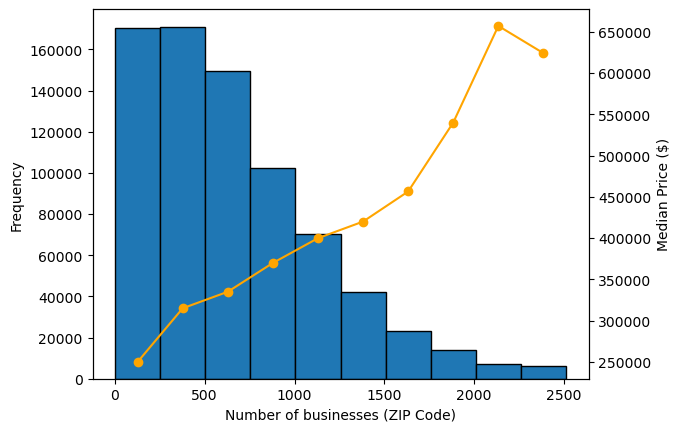

In [126]:
# Number of businesses univariate
fig, ax = plt.subplots()

hist_business = ax.hist(sold_merged[sold_merged.nobusiness <= sold_merged.nobusiness.quantile(0.99)].nobusiness, ec = 'black')
midpts = [((hist_business[1][x] + hist_business[1][x+1])/2) for x in range(len(hist_business[1])-1)]
prices = [sold_merged[(sold_merged.nobusiness >= hist_business[1][x]) & (sold_merged.nobusiness < hist_business[1][x+1])].price.median() for x in range(len(hist_business[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Number of businesses (ZIP Code)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[318448.6, 949495.7999999999, 1580543.0, 2211590.1999999997, 2842637.4, 3473684.5999999996, 4104731.8, 4735779.0, 5366826.199999999, 5997873.4]


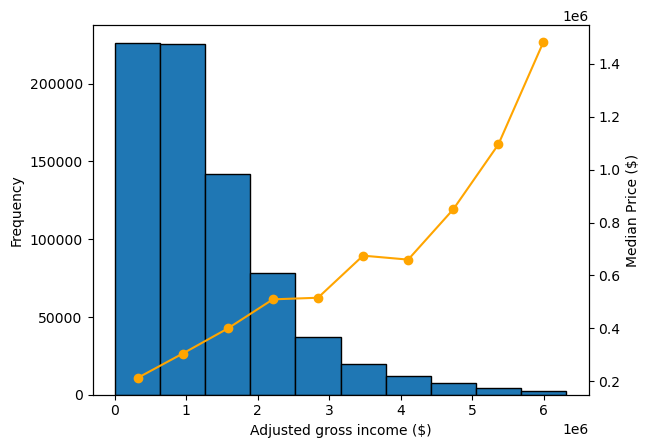

In [127]:
# Adjusted income univariate
fig, ax = plt.subplots()

hist_incomea = ax.hist(sold_merged[sold_merged.adjusted_gross_income <= sold_merged.adjusted_gross_income.quantile(0.99)].adjusted_gross_income, ec = 'black')
midpts = [((hist_incomea[1][x] + hist_incomea[1][x+1])/2) for x in range(len(hist_incomea[1])-1)]
prices = [sold_merged[(sold_merged.adjusted_gross_income >= hist_incomea[1][x]) & (sold_merged.adjusted_gross_income < hist_incomea[1][x+1])].price.median() for x in range(len(hist_incomea[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Adjusted gross income ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[321887.75, 959813.25, 1597738.75, 2235664.25, 2873589.75, 3511515.25, 4149440.75, 4787366.25, 5425291.75, 6063217.25]


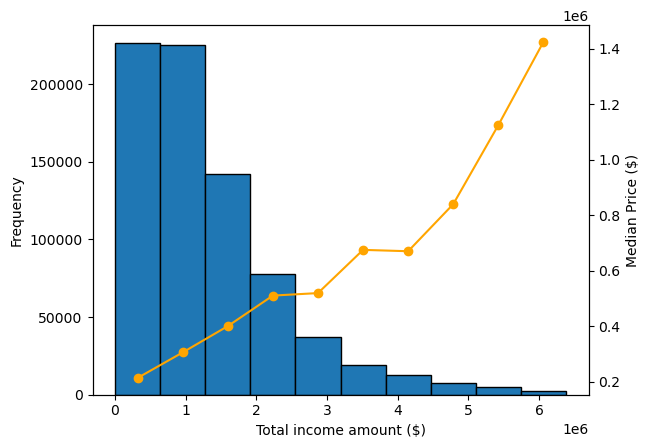

In [128]:
# Total income univariate
fig, ax = plt.subplots()

hist_incomet = ax.hist(sold_merged[sold_merged.total_income_amount <= sold_merged.total_income_amount.quantile(0.99)].total_income_amount, ec = 'black')
midpts = [((hist_incomet[1][x] + hist_incomet[1][x+1])/2) for x in range(len(hist_incomet[1])-1)]
prices = [sold_merged[(sold_merged.total_income_amount >= hist_incomet[1][x]) & (sold_merged.total_income_amount < hist_incomet[1][x+1])].price.median() for x in range(len(hist_incomet[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Total income amount ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[2224.0, 6492.0, 10760.0, 15028.0, 19296.0, 23564.0, 27832.0, 32100.0, 36368.0, 40636.0]


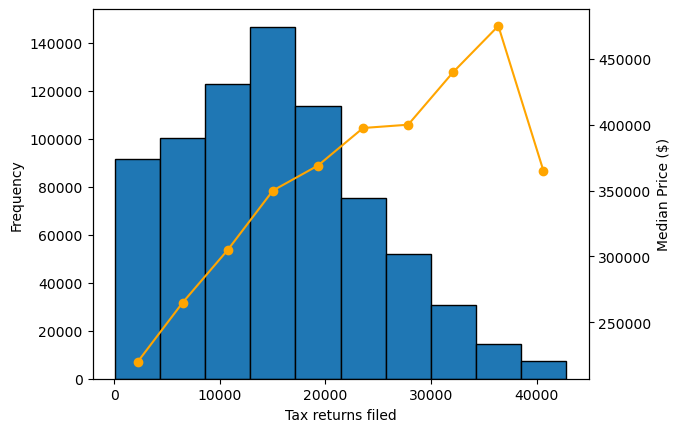

In [129]:
# Tax returns univariate
fig, ax = plt.subplots()

hist_treturns = ax.hist(sold_merged[sold_merged.number_of_returns <= sold_merged.number_of_returns.quantile(0.99)].number_of_returns, ec = 'black')
midpts = [((hist_treturns[1][x] + hist_treturns[1][x+1])/2) for x in range(len(hist_treturns[1])-1)]
prices = [sold_merged[(sold_merged.number_of_returns >= hist_treturns[1][x]) & (sold_merged.number_of_returns < hist_treturns[1][x+1])].price.median() for x in range(len(hist_treturns[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Tax returns filed')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

In [ ]:
# Functions for capping outliers on columns
def cap_outliers_percentile(column, percentile):
    col = sold_merged[column]
    cap = col.quantile(percentile)
    print('Capped ', column, ' on the ', percentile*100, 'th percentile (', cap, ')', sep = '')
    return col.apply(lambda x: cap if x > cap else x)

def cap_outliers_value(column, cap, side = 'above'):
    col = sold_merged[column]
    print('Capped ', column, ' from ', side, ' on ', cap, sep = '')
    if side == 'above':
        return col.apply(lambda x: cap if x > cap else x)
    if side == 'below':
        return col.apply(lambda x: cap if x < cap else x)
    else:
        print('Please choose either \'above\' or \'below\' for side argument.')

In [ ]:
# Cap outliers in new columns
sold_merged['treated_bed'] = cap_outliers_percentile('bed', 0.99)
sold_merged['treated_bath'] = cap_outliers_percentile('bath', 0.99)
sold_merged['treated_acre'] = cap_outliers_percentile('acre_lot', 0.95)
sold_merged['treated_size'] = cap_outliers_percentile('house_size', 0.99)
sold_merged['treated_avgtemp'] = cap_outliers_value('avgtemp', 45.56, 'below')
sold_merged['treated_maxtemp'] = cap_outliers_value('maxtemp', 58.225, 'below')
sold_merged['treated_mintemp'] = cap_outliers_value('mintemp', 34.46, 'below')
sold_merged['treated_precip'] = cap_outliers_value('precipitation', 88.175)
sold_merged['treated_pop'] = cap_outliers_value('population', 96874)
sold_merged['treated_density'] = cap_outliers_value('density', 5548.365)
sold_merged['treated_dhighway'] = cap_outliers_value('dhighway', 40.80598856361732)
sold_merged['treated_dlairport'] = cap_outliers_value('dlairport', 240.3445185128118)
sold_merged['treated_dmairport'] = cap_outliers_value('dmairport', 67.965371255)
sold_merged['treated_dshore'] = cap_outliers_value('dshore', 675.6745467796691)
sold_merged['treated_nobusiness'] = cap_outliers_value('nobusiness', 2135)
sold_merged['treated_totalincome'] = cap_outliers_value('total_income_amount', 6063217.25)
sold_merged['treated_adjustedincome'] = cap_outliers_value('adjusted_gross_income', 5997873.4)
sold_merged['treated_returns'] = cap_outliers_value('number_of_returns', 36368)

Capped bed on the 99.0th percentile (6.0)
Capped bath on the 99.0th percentile (6.0)
Capped acre_lot on the 95.0th percentile (5.0)
Capped house_size on the 99.0th percentile (5400.0)
Capped avgtemp from below on 45.56
Capped maxtemp from below on 58.225
Capped mintemp from below on 34.46
Capped precipitation from above on 88.175
Capped population from above on 96874
Capped density from above on 5548.365
Capped dhighway from above on 40.80598856361732
Capped dlairport from above on 240.3445185128118
Capped dmairport from above on 67.965371255
Capped dshore from above on 675.6745467796691
Capped nobusiness from above on 2135
Capped total_income_amount from above on 6063217.25
Capped adjusted_gross_income from above on 5997873.4
Capped number_of_returns from above on 36368


In [134]:
# In advance of any imputation, add a flag to say if the value was originally missing
sold_merged['missing_bed'] = sold_merged['bed'].isna().astype('int')
sold_merged['missing_bath'] = sold_merged['bath'].isna().astype('int')
sold_merged['missing_acre'] = sold_merged['acre_lot'].isna().astype('int')
sold_merged['missing_size'] = sold_merged['house_size'].isna().astype('int')
sold_merged['missing_business'] = sold_merged['nobusiness'].isna().astype('int')
sold_merged['missing_city'] = sold_merged['city'].isna().astype('int')
sold_merged['missing_street'] = sold_merged['street'].isna().astype('int')
sold_merged['missing_brokerage'] = sold_merged['brokered_by'].isna().astype('int')

In [136]:
# Filling missing bed values where house_size is present
bed1_size_med = sold_merged[sold_merged.bed == 1].house_size.median()
bed2_size_med = sold_merged[sold_merged.bed == 2].house_size.median()
bed3_size_med = sold_merged[sold_merged.bed == 3].house_size.median()
bed4_size_med = sold_merged[sold_merged.bed == 4].house_size.median()
bed5_size_med = sold_merged[sold_merged.bed == 5].house_size.median()
bed6_size_med = sold_merged[sold_merged.bed == 6].house_size.median()
print(bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med)
# We will compare the house_size for these rows against the medians and impute bed number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bed.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bed'] = np.argmin(diffs)+1

747.0 1148.0 1595.0 2262.0 3073.0 3500.0


In [137]:
# Filling missing bath values where house_size is present
bath1_size_med = sold_merged[sold_merged.bath == 1].house_size.median()
bath2_size_med = sold_merged[sold_merged.bath == 2].house_size.median()
bath3_size_med = sold_merged[sold_merged.bath == 3].house_size.median()
bath4_size_med = sold_merged[sold_merged.bath == 4].house_size.median()
bath5_size_med = sold_merged[sold_merged.bath == 5].house_size.median()
bath6_size_med = sold_merged[sold_merged.bath == 6].house_size.median()
print(bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med)
# We will compare the house_size for these rows against the medians and impute bath number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bath.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bath'] = np.argmin(diffs)+1

1000.0 1506.0 2180.0 2994.0 4037.0 4927.5


In [ ]:
# Imputing remaining 
bed_med = sold_merged.bed.median()
bath_med = sold_merged.bath.median()
acre_med = sold_merged.acre_lot.median()
size_med = sold_merged.house_size.median()
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 1) & (sold_merged['missing_size'] == 1)), bed_med)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 1) & (sold_merged['missing_size'] == 1)), bath_med)
sold_merged['treated_acre'] = sold_merged['treated_acre'].where(~(sold_merged['missing_acre'] == 1), acre_med)
sold_merged['treated_size'] = sold_merged['treated_size'].where(~(sold_merged['missing_size'] == 1), size_med)

In [149]:
# Make a clean copy of the dataframe containing only the variables we need
sold_treated = sold_merged.copy()
sold_treated = sold_treated[['brokered_by', 'price', 'street', 'city', 'state', 'zip_code', 'prev_sold_date', 'county', 'po_box', 'treated_bed', 'treated_bath', 'treated_acre', 'treated_size', 'treated_avgtemp', 'treated_maxtemp', 'treated_mintemp', 'treated_precip', 'treated_pop', 'treated_density', 'treated_dhighway', 'treated_dlairport', 'treated_dmairport', 'treated_dshore', 'treated_nobusiness', 'treated_totalincome', 'treated_adjustedincome', 'treated_returns', 'missing_bed', 'missing_bath', 'missing_acre', 'missing_size', 'missing_business', 'missing_city', 'missing_street', 'missing_brokerage']]
sold_treated = sold_treated.dropna()
sold_treated = sold_treated.rename(columns = {'treated_bed':'bed', 'treated_bath':'bath', 'treated_acre':'acre_lot', 'treated_size':'house_size', 'treated_avgtemp':'avgtemp', 'treated_maxtemp':'maxtemp', 'treated_mintemp':'mintemp', 'treated_precip':'precipitation', 'treated_pop':'population', 'treated_density':'density', 'treated_dhighway':'dhighway', 'treated_dlairport':'dlairport', 'treated_dmairport':'dmairport', 'treated_dshore':'dshore', 'treated_nobusiness':'nobusiness', 'treated_totalincome':'totalincome', 'treated_adjustedincome':'adjustedincome', 'treated_returns':'tax_returns'})

In [153]:
sold_treated.to_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_treated.csv")